In [59]:
# Chương 3: Tiền xử lý và phân tích dữ liệu

In [60]:
# Cài đặt một số hàm tiền xử lý văn bản cần thiết 
import regex as re
from underthesea import word_tokenize
 
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()

# Hàm chuyển Unicode dựng sẵn về Unicde tổ hợp
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)
def text_preprocess(document):
    # xóa html code
    document = remove_html(document)
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # chuẩn hóa cách gõ dấu tiếng Việt
    document = chuan_hoa_dau_cau_tieng_viet(document)
    # tách từ
    document = document.split()
    # đưa về lower
    document = str(document)
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [61]:


document = """
Nhân mã quả thực từng tồn tại?
Các nhà nghiên cứu khẳng định những sinh vật nửa người nửa thú trong thần thoại Hy Lạp thực sự tồn tại. Họ tìm thấy không ít những bức họa trên đá mô tả chúng và tin rằng các họa sĩ cổ đại đã thực hiện tác phẩm của mình từ chất liệu cuộc sống. 
Paul Takon từ Bảo tàng Australia ở Sydney và nhà cổ sinh vật học Christopher Chippendale từ Đại học Cambridge cho biết những sinh vật lai kiểu này, trong đó có Nhân mã, có thể đã từng sống song hành cùng cha mẹ nguyên thuỷ của chúng. Ở Australia và Nam Phi, nhóm nghiên cứu phát hiện hàng chục các bức vẽ trên đá mô tả động vật mang đầu người hoặc hình người có đầu động vật, có niên đại hơn 32 nghìn năm. 
Hình tượng Nhân mã.
Lần đầu tiên trong lịch sử, họ đã thực hiện một nghiên cứu chi tiết về những bức vẽ kỳ lạ này, sử dụng khoảng 5.000 bức tranh đá của tổ tiên chúng ta: các nhà khoa học đã hệ thống hoá tần xuất xuất hiện và kiểu người lai được mô tả, cũng như định tuổi của chúng. Sau cùng, nhóm đi đến kết luận rằng người mình thú thực sự tồn tại trong quá khứ xa xưa. Theo các nhà nghiên cứu, người nguyên thuỷ không bao giờ vẽ ra những gì họ không nhìn thấy
Thần thoại La Mã và Hy Lạp cổ đại cũng kể cho chúng ta nghe nhiều về những người có cơ thể động vật, và Nhân mã (centaur) là ví dụ thường gặp nhất. Đó là những sinh vật có thân trên của con người, nhưng với chân của ngựa hoặc các động vật khác, như bò đực, lừa, cừu và thậm chí cả dê. Tên gọi centaur là sự hợp nhất của từ Ken (nghĩa là Tôi giết) và Tauros (nghĩa là bò đực), và nó cũng cho thấy vốn hiểu biết thiên văn của người xưa. Khi chòm sao của cung Nhân mã (với các centaur đang ném một cây giáo) xuất hiện trên bầu trời đêm, chúng ta không thể nhìn thấy Kim ngưu, một trong các biểu tượng của mặt trời.
Chuyên gia về thần thoại học đồng thời là nhà khoa học lịch sử Alexander Guryev cho biết người mình thú là kết quả của hành vi thú dâm - sự giao cấu giữa người và động vật, điều khá phổ biến trong các thời kỳ nguyên thuỷ. Họ cũng lưu ý nhiều tộc người đến tận bây giờ vẫn xem mình là hậu duệ của động vật: Chẳng hạn người Tây Tạng tin chắc họ có nguồn gốc từ khỉ, người Hindu coi ngựa là ông tổ và người Thái xem mình là hậu duệ của chó.Một thần thoại Hy Lạp kể rằng nhà chinh phục Alexander Đại đế được thụ thai trong lần giao phối giữa một con rắn cỏ, do thần Zeus (vị thần bảo trợ cho tất cả các thần và con người) hoá thân với Olympia, con gái của hoàng đế Macedonia. 
Sử sách cũng tiết lộ hành vi thú dâm quả thực rất thường gặp trong thời kỳ Hy Lạp và La Mã cổ đại. Nhà văn châm biếm người La Mã Juvenalis viết rằng "phụ nữ La Mã thường trưng cái mông trần của họ để lôi cuốn lũ cừu vào các cuộc giao hoan". Ở Ai Cập, những cuộc giao cấu này là một phần của nghi thức sùng bái sự sinh nở. 
Trong những thời kỳ cổ đại, các chiến binh thường mang theo những đàn cừu hoặc dê trong mọi cuộc chiến, sử dụng vào mục đích giết thịt và chơi trò giao cấu. Có văn bản còn ghi lại rằng những người lính Italy đã đào ngũ trong cuộc bao vây Lyons của những tín đồ công giáo vào năm 1562 vì họ có quá ít cừu để thực hiện sex. Việc cho phép giao cấu giữa những người lính và động được xem là ít xấu xa hơn quan hệ với gái điếm. Các học giả đáng kính - Paracelsus, Cardano và bà đỡ nổi tiếng của thế kỷ 16 Fortunio Liceti cũng đã một vài lần ghi lại sự ra đời của những đứa trẻ lai, động vật do người sinh ra, và người do động vật sinh ra. Ghi chép của họ nói đến ngựa, voi, chó và thậm chí cả sư tử. 
Cũng theo Alexander Guryev, nhiều năm trước khoa học chính thống không thừa nhận khả năng lai chéo giữa người và động vật. Nhưng gần đây, những nguồn tin khoa học đáng chú ý đã công bố kết quả thí nghiệm gene, trong đó các nhà nghiên cứu thu được những phôi có một nửa số tế bào người và nửa của động vật. Từ quan điểm khoa học, sự khác biệt giữa người và động vật chỉ là vài phần trăm. Điều đó có nghĩa là không loại trừ khả năng những đột biến tự phát xảy ra trong các tình huống hiếm hoi, và việc lai giống tự nhiên là hoàn toàn có thể trong những trường hợp như vậy. 
Nhà giải phẫu học danh tiếng người Đan Mạch Thomas Bartolin viết rằng ông từng nhìn thấy một phụ nữ có đứa con với cái đầu mèo sau khi giao cấu với một con mèo. Sách y học của thế kỷ 19-20 cũng mô tả những trường hợp ra đời các sinh vật người-động vật. 
Vào cuối thế kỷ trước, một vài nhà nghiên cứu Anh đã viết về những phụ nữ da đen sống cùng với gorilla. Những đứa trẻ sinh ra từ các cuộc giao cấu này có thể làm được những việc đơn giản ở nhà và thậm chí có thể nói. Không may, các nhà nghiên cứu không có cơ hội nhìn thấy chúng vì các em bé lai cảm thấy bị tổn thương mạnh mẽ và đã trốn vào rừng. Alexander Guryev còn cho biết tuy các nhà nghiên cứu không có bộ xương mẫu nào của các sinh vật lai, song họ không thiếu những phần trên và dưới của các bộ xương đó. 


"""

document = text_preprocess(document)
print(document)

nhân mã quả thực từng tồn tại các nhà nghiên cứu khẳng định những sinh vật nửa người nửa thú trong thần thoại hy lạp thực sự tồn tại họ tìm thấy không ít những bức họa trên đá mô tả chúng và tin rằng các họa sĩ cổ đại đã thực hiện tác phẩm của mình từ chất liệu cuộc sống paul takon từ bảo tàng australia ở sydney và nhà cổ sinh vật học christopher chippendale từ đại học cambridge cho biết những sinh vật lai kiểu này trong đó có nhân mã có thể đã từng sống song hành cùng cha mẹ nguyên thủy của chúng ở australia và nam phi nhóm nghiên cứu phát hiện hàng chục các bức vẽ trên đá mô tả động vật mang đầu người hoặc hình người có đầu động vật có niên đại hơn 32 nghìn năm hình tượng nhân mã lần đầu tiên trong lịch sử họ đã thực hiện một nghiên cứu chi tiết về những bức vẽ kỳ lạ này sử dụng khoảng 5 000 bức tranh đá của tổ tiên chúng ta các nhà khoa học đã hệ thống hóa tần xuất xuất hiện và kiểu người lai được mô tả cũng như định tuổi của chúng sau cùng nhóm đi đến kết luận rằng người mình thú t

In [62]:
# Đọc ngẫu nhiên dữ liệu từ file data

In [63]:
import pandas as pd
df = pd.read_csv('data.csv', header = None);

In [64]:
# Từ đầu tiên của các văn bản luôn là từ chứa label chủ đề

In [65]:
df

,0
0,__label__Chính_trị biển nha_trang đã bắt_đầu s...
1,__label__Chính_trị dân hà_nội vội_vàng nộp thu...
2,__label__Chính_trị trăn_trở của một du_học_sin...
3,__label__Chính_trị học_bổng tiến_sĩ toàn phần ...
4,__label__Chính_trị du_lịch 29 tình_trạng quá_t...
...,...
2294,__label__Đời_sống sinh_đôi một đen một trắng c...
2295,__label__Đời_sống 10 thời_điểm nàng muốn được ...
2296,__label__Đời_sống làm trọng_tài cho con_cái ng...
2297,__label__Đời_sống những kiểu bạo_hành trong tì...


In [66]:
# Tập dữ liệu có 10 chủ đề/nhãn, mỗi nhãn có số lượng bài báo khác nhau

In [38]:
count = {}
for line in open("data.csv", encoding='utf-8'):
    try:
        key = line.split()[0]
        count[key] = count.get(key, 0) + 1
    except IndexError:
        pass

for key in count:
    print(key, count[key])


__label__Chính_trị 244
__label__Khoa_học 228
__label__Kinh_doanh 242
__label__Pháp_luật 214
__label__Sức 239
__label__Thế_giới 207
__label__Thể_thao 239
__label__Vi_tính 241
__label__Văn_hóa 206
__label__Đời_sống 239


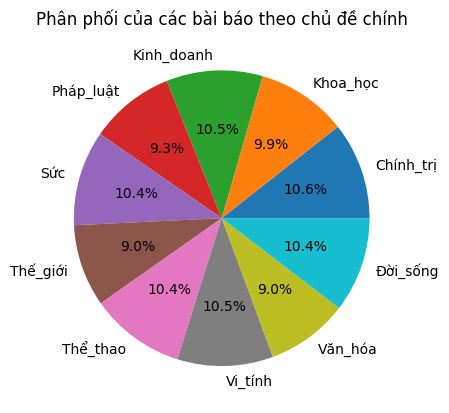

In [56]:
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
with open("data.csv", encoding="utf-8") as f:
    data = f.readlines()

# Tạo một danh sách các chủ đề
topics = []
for line in data:
    try:
        topics.append(line.split()[0][len("__label__"):])
    except IndexError:
        pass

# Tính số lượng bài báo cho mỗi chủ đề
counts = {}
for topic in topics:
    counts[topic] = counts.get(topic, 0) + 1

# Tính tỷ lệ phần trăm của mỗi chủ đề
percentages = {}
for topic, count in counts.items():
    percentages[topic] = count / len(data) * 100

# Vẽ biểu đồ tròn
plt.pie(percentages.values(), labels=percentages.keys(), autopct="%.1f%%")
plt.title("Phân phối của các bài báo theo chủ đề chính")
plt.show()


In [68]:
# Dữ liệu đã được tiền xử lý 

In [69]:
print(line)

__label__Đời_sống vợ_chồng lệch gu vợ lẳng_lặng tắt tivi không nói không rằng đùng_đùng đóng sầm cửa phòng mọi chuyện diễn ra chớp_nhoáng anh chồng ngơ_ngác nhìn cô vợ đã từng được mệnh_danh hiền như cục đất rồi bất_động trên chiếc salon quen nhau từ thời trung_học văn_lộc và xuân_hạnh chẳng xa_lạ gì tính nết nhau thậm_chí chỉ cần hạnh than mệt là lộc biết ngay hạnh đang thèm_ăn cái gì mặc_dù vậy có những điều_lộc vẫn không_tài_nào chiều được cô vợ thời ấy vì yêu nhau chưa bao_giờ lộc nghĩ những điều đó sẽ trở_thành trở_ngại cho cuộc_sống vợ_chồng sau_này cưới nhau được 6 tháng là đã hết 4 tháng cặp vợ_chồng trẻ này cãi nhau chỉ vì chuyện xem tivi buổi sáng tối nào hạnh cũng thức khuya làm_việc nên sáng ra cô chỉ muốn đẫy_giấc tới giờ đi làm thế nhưng lộc luôn bật tivi lúc 6 h kém 15 để nghe tin_tức căn phòng vỏn_vẹn hai mươi mấy mét_vuông tivi lại để ngay chỗ ngủ cô vợ trẻ kéo chăn trùm kín mặt trở_qua trở_lại với vẻ mặt_cau có rồi xoay qua nhắc khéo chồng lộc chẳng_những không hạn_ch

In [70]:
# Thống kê các word xuất hiện ở tất cả các nhãn
def count_word(filePath):
    vocab = {}
    label_vocab = {}
    for line in open(filePath, encoding='utf-8'):
        try: 
            words = line.split()
            # lưu ý từ đầu tiên là nhãn
            label = words[0]
            if label not in label_vocab:
                label_vocab[label] = {}
            for word in words[1:]:
                label_vocab[label][word] = label_vocab[label].get(word, 0) + 1
                if word not in vocab:
                    vocab[word] = set()
                vocab[word].add(label)
        except IndexError:
            pass
    print(len(vocab))
    count = {}
    for word in vocab:
        count[word] = sum([label_vocab[x][word] for x in vocab[word]])
    sorted_count = sorted(count, key=count.get, reverse=True)
    for word in sorted_count[:20]:
        print(word, count[word])
count_word('data.csv')

43461
và 14414
của 14217
là 11056
có 10890
các 9953
trong 9922
một 8864
được 8806
cho 8617
không 8044
những 7629
đã 7571
người 7557
với 7250
khi 5528
ở 5506
này 5428
để 5420
sẽ 5125
cũng 4562


In [71]:
# tập dữ liệu đang có khoảng 40 nghìn từ, đây cũng là số chiều của vector đặc trưng. Tuy nhiên, trong số đó có những từ có tần suất 
# xuất hiện rất lớn nhưng không có tác dụng trong việc thể hiện chủ đề của văn bản. Ta gọi đó là những từ dừng (stopwords)
# Như trên dữ liệu ta thấy các từ như của, và, là,... có tần suất xuất hiện cao, nhưng không thể hiện nhiều ý nghĩa.
# Vậy nên ta cần loại bỏ chúng đi để giảm chiều dữ liệu mà vẫn giữ nguyên chủ đề của văn bản.


In [72]:
# Đọc tập stopwords 
with open('stopwords-nlp-vi.txt', 'r', encoding = "utf-8") as f:
    stopwords = set([w.strip().replace(' ', '_') for w in f.readlines()])
print("Stopwords có " + str(len(stopwords)) + " từ")


Stopwords có 2203 từ


In [73]:
# loại stopword khỏi dữ liệu 
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

with open('database.prep', 'w', encoding='utf-8') as fp, open('data.csv', encoding='utf-8') as f:
    for line in f:
        line = remove_stopwords(line)
        fp.write(line + '\n')
count_word('database.prep')

42566
2 2370
1 2192
3 1958
5 1442
tiền 1318
công_ty 1307
4 1306
việt_nam 1246
giá 1132
10 1081
000 1068
vn 991
6 933
mỹ 902
tp 890
doanh_nghiệp 834
tổ_chức 805
ta 774
hcm 774
phát_triển 764


In [74]:
# Chương 4: Model
# Ta sẽ sử dụng 3 mô hình học máy: Naive Bayes, KNN với 2 độ đo cosine và euclid, và SVM

In [75]:
!dir database.prep

 Volume in drive D is New Volume
 Volume Serial Number is 3695-B0F5

 Directory of d:\.vscode\Code d?o\ML\diamond_crawling\DS

01/08/2024  04:23 PM         3,921,523 database.prep
               1 File(s)      3,921,523 bytes
               0 Dir(s)  282,957,934,592 bytes free


In [76]:
# Chia tập train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
test_percent = 0.2

text = []
label = []

with open('database.prep', encoding='utf-8') as f: 
    for line in f:
        words = line.strip().split()
        label.append(words[0])
        text.append(' '.join(words[1:]))
        

X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=test_percent, random_state=42)

with open('train.txt', 'w', encoding='utf-8') as fp:
    for x, y in zip(X_train, y_train):
        fp.write('{} {}\n'.format(y, x))

with open('test.txt', 'w', encoding='utf-8') as fp: 
    for x, y in zip(X_test, y_test):
        fp.write('{} {}\n'.format(y, x))

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print(list(label_encoder.classes_), '\n')
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)



['__label__Chính_trị', '__label__Khoa_học', '__label__Kinh_doanh', '__label__Pháp_luật', '__label__Sức', '__label__Thế_giới', '__label__Thể_thao', '__label__Vi_tính', '__label__Văn_hóa', '__label__Đời_sống'] 



In [77]:
# 80% dữ liệu sẽ là dữ liệu train, 20% là dữ liệu test

In [78]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)



(1839,)
(1839,)


In [79]:
MODEL_PATH = "models"

import os
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)


In [80]:
# Naive Bayes

In [81]:
import pickle
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                    
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ])
text_clf = text_clf.fit(X_train, y_train)

NB_train_time = time.time() - start_time
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "naive_bayes.pkl"), 'wb'))

In [82]:
# KNN với độ đo cosine

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score

# Tạo pipeline gộp CountVectorizer, TfidfTransformer và KNN với độ đo cosine
text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1),
                            max_features=None)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=5, metric='cosine'))
])

# Huấn luyện mô hình trên tập huấn luyện
text_clf.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = text_clf.predict(X_test)
KNNCos_train_time = time.time() - start_time



pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "knn_cosine.pkl"), 'wb'))

In [84]:
# KNN với độ đo euclide

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score

# Tạo pipeline gộp CountVectorizer, TfidfTransformer và KNN với độ đo euclide
text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1),
                             max_features=None)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=4, metric='euclidean'))
])

# Huấn luyện mô hình trên tập huấn luyện
text_clf.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = text_clf.predict(X_test)
KNNEuc_train_time = time.time() - start_time


pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "knn_euclide.pkl"), 'wb'))

In [86]:
# SVM

In [87]:
from sklearn.svm import SVC

start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', SVC(gamma='scale'))
                    ])
text_clf = text_clf.fit(X_train, y_train)

SVM_train_time = time.time() - start_time


# Save model
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "svm.pkl"), 'wb'))

In [88]:
# Thời gian train mô hình

In [89]:
print('NB: ', NB_train_time, 'seconds.')
print('KNN cosine: ', KNNCos_train_time, 'seconds.')
print('KNN euclide: ', KNNEuc_train_time, 'seconds.')
print('SVM: ', SVM_train_time, 'seconds.')




NB:  1.240311622619629 seconds.
KNN cosine:  2.8151721954345703 seconds.
KNN euclide:  7.088766813278198 seconds.
SVM:  11.833640813827515 seconds.


In [90]:
# Test các mô hình và kết quả

In [91]:
# Naive Bayes
from sklearn.metrics import classification_report
model = pickle.load(open(os.path.join(MODEL_PATH,"naive_bayes.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('Naive Bayes')
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

# KNN
model = pickle.load(open(os.path.join(MODEL_PATH,"knn_cosine.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('KNN Cosine')
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

# KNN
model = pickle.load(open(os.path.join(MODEL_PATH,"knn_euclide.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('KNN Euclide')
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

# SVM
model = pickle.load(open(os.path.join(MODEL_PATH,"svm.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('SVM')
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))
    
# model = fasttext.load_model(os.path.join(MODEL_PATH,"fasttext.ftz"))
# print_results(*model.test('test.txt'))

Naive Bayes
                     precision    recall  f1-score   support

 __label__Chính_trị       0.73      0.73      0.73        51
  __label__Khoa_học       0.93      0.50      0.65        50
__label__Kinh_doanh       0.85      0.94      0.89        48
 __label__Pháp_luật       0.79      1.00      0.88        30
       __label__Sức       0.85      0.90      0.87        49
  __label__Thế_giới       0.86      0.84      0.85        43
  __label__Thể_thao       0.94      0.98      0.96        48
   __label__Vi_tính       0.86      0.95      0.90        44
   __label__Văn_hóa       1.00      0.67      0.80        49
  __label__Đời_sống       0.66      0.90      0.76        48

           accuracy                           0.83       460
          macro avg       0.85      0.84      0.83       460
       weighted avg       0.85      0.83      0.83       460

KNN Cosine
                     precision    recall  f1-score   support

 __label__Chính_trị       0.56      0.69      0.61        

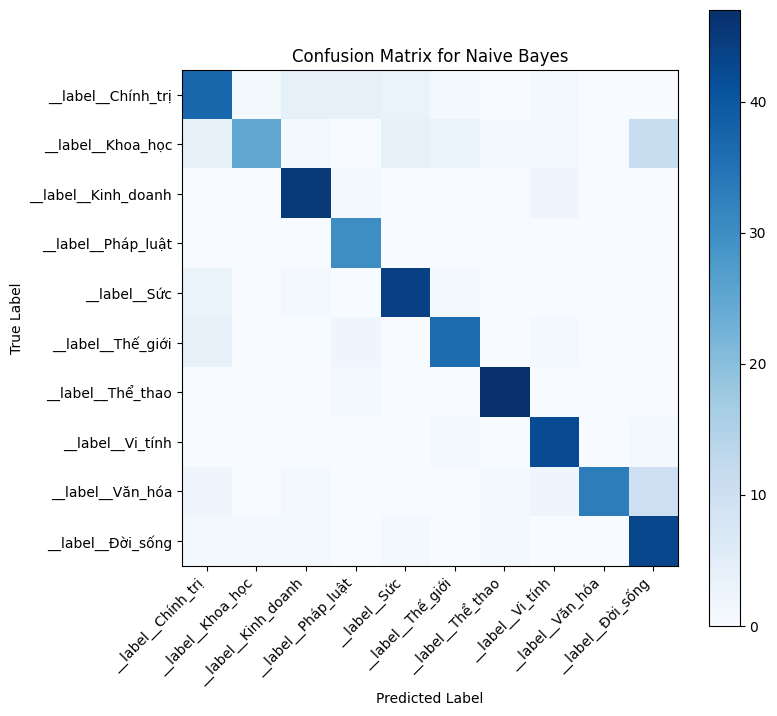

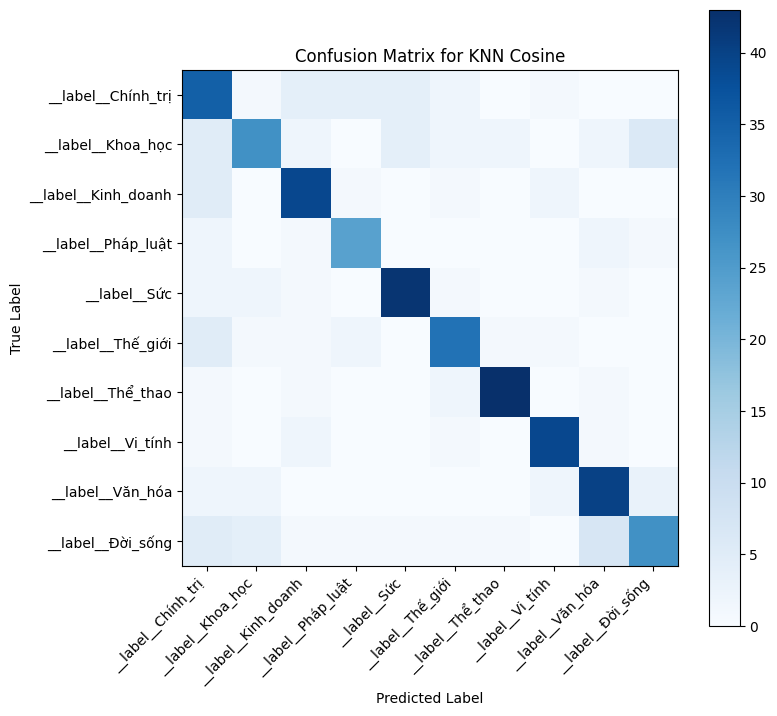

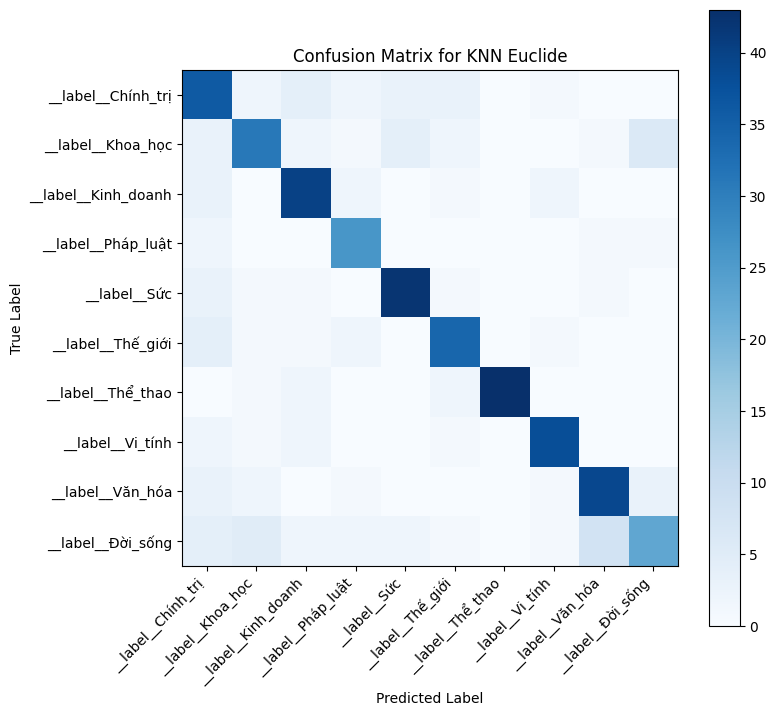

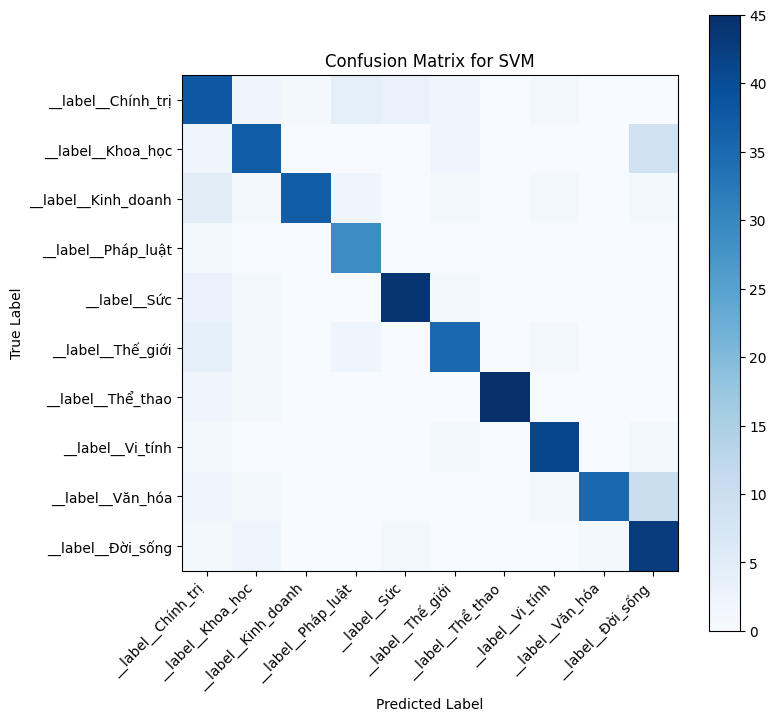

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hàm vẽ biểu đồ ma trận hỗn hợp
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    plt.xticks(list(range(len(label_encoder.classes_))), label_encoder.classes_, rotation=45, ha='right')
    plt.yticks(list(range(len(label_encoder.classes_))), label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Vẽ biểu đồ cho từng model
for model_name, model_path in [("Naive Bayes", "naive_bayes.pkl"),
                                ("KNN Cosine", "knn_cosine.pkl"),
                                ("KNN Euclide", "knn_euclide.pkl"),
                                ("SVM", "svm.pkl")]:
    model = pickle.load(open(os.path.join(MODEL_PATH, model_path), 'rb'))
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)


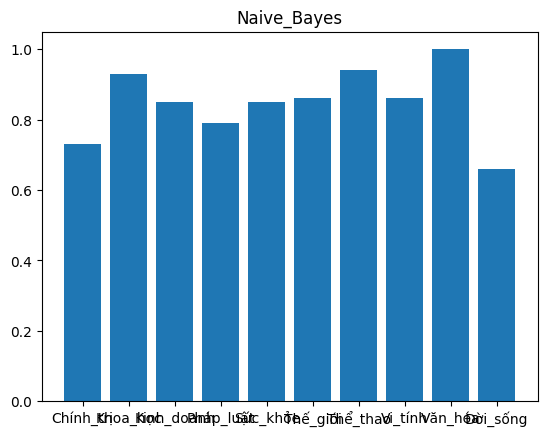

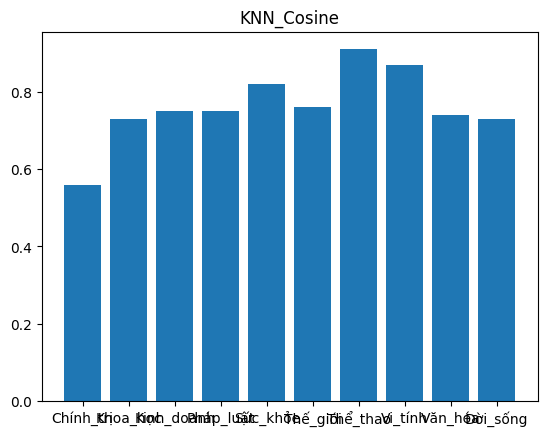

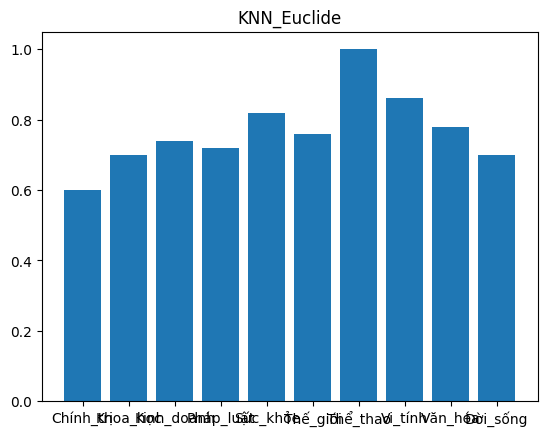

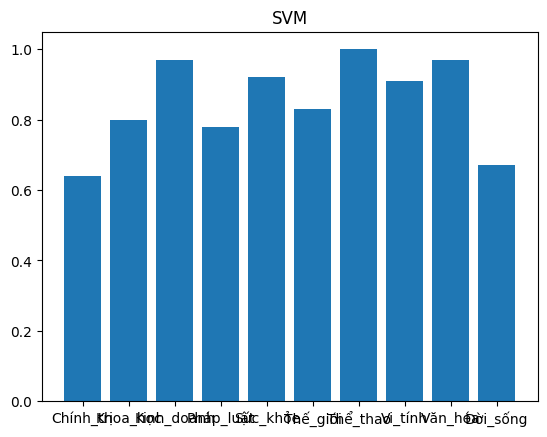

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ bảng
df = pd.DataFrame({
    "label": ["Chính_trị", "Khoa_học", "Kinh_doanh", "Pháp_luật", "Sức_khỏe", "Thế_giới", "Thể_thao", "Vi_tính", "Văn_hóa", "Đời_sống"],
    "Naive_Bayes": [0.73, 0.93, 0.85, 0.79, 0.85, 0.86, 0.94, 0.86, 1.00, 0.66],
    "KNN_Cosine": [0.56, 0.73, 0.75, 0.75, 0.82, 0.76, 0.91, 0.87, 0.74, 0.73],
    "KNN_Euclide": [0.60, 0.70, 0.74, 0.72, 0.82, 0.76, 1.00, 0.86, 0.78, 0.70],
    "SVM": [0.64, 0.80, 0.97, 0.78, 0.92, 0.83, 1.00, 0.91, 0.97, 0.67]
})

# Tạo biểu đồ bar cho mỗi phương pháp học máy
for method in df.columns[1:]:
    plt.bar(df["label"], df[method])
    plt.title(method)
    plt.show()


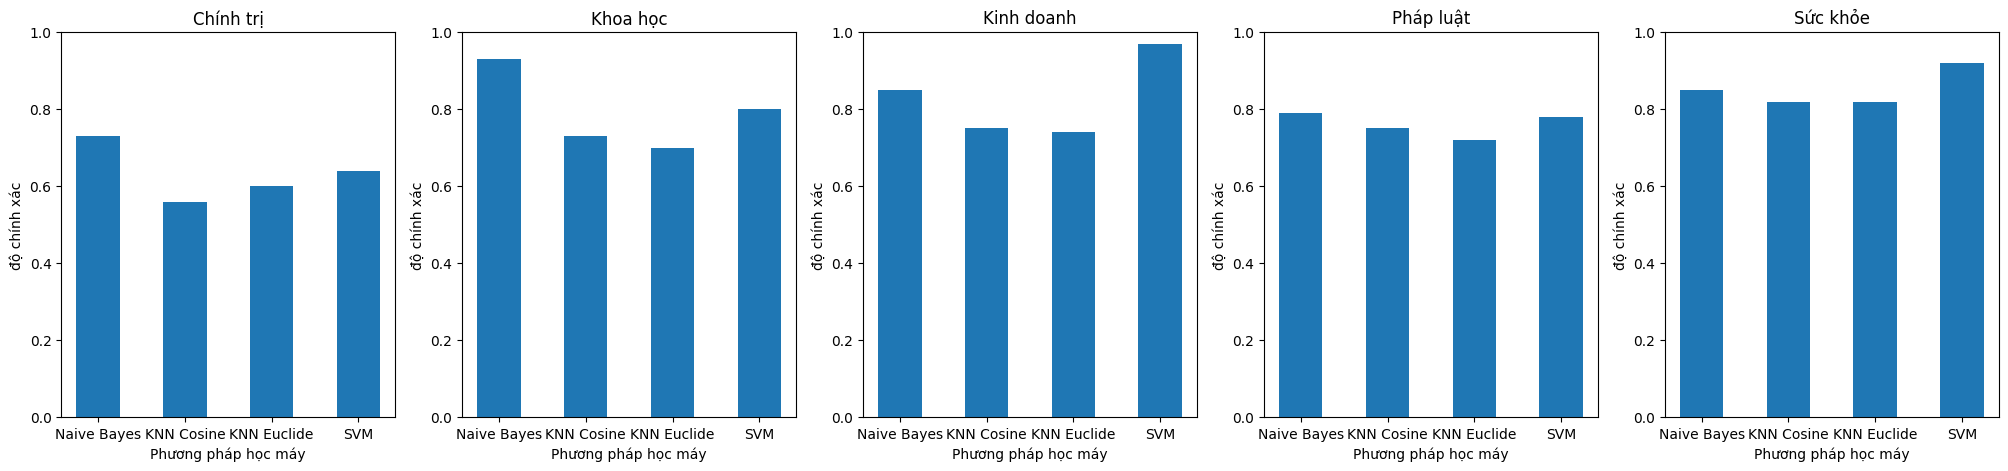

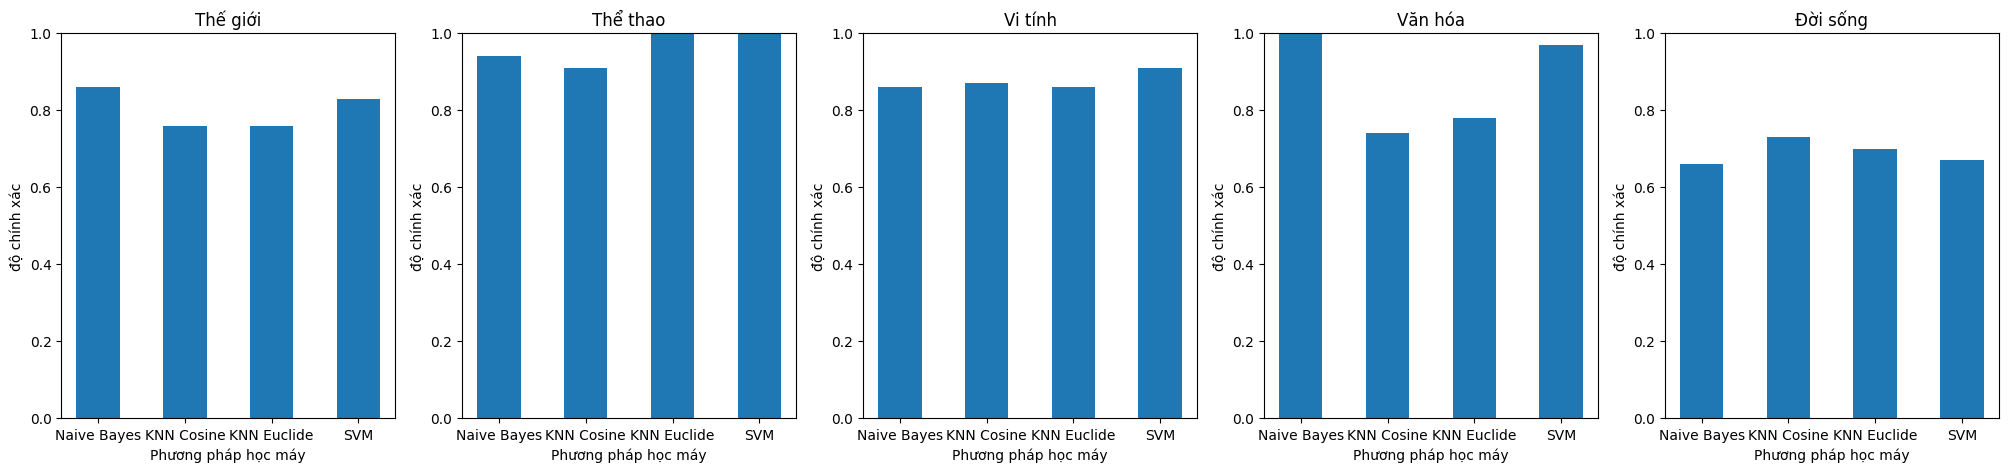

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ bảng
data = pd.DataFrame({
    "label": ["Chính trị", "Khoa học", "Kinh doanh", "Pháp luật", "Sức khỏe", "Thế giới", "Thể thao", "Vi tính", "Văn hóa", "Đời sống"],
    "Naive Bayes": [0.73, 0.93, 0.85, 0.79, 0.85, 0.86, 0.94, 0.86, 1.00, 0.66],
    "KNN Cosine": [0.56, 0.73, 0.75, 0.75, 0.82, 0.76, 0.91, 0.87, 0.74, 0.73],
    "KNN Euclide": [0.60, 0.70, 0.74, 0.72, 0.82, 0.76, 1.00, 0.86, 0.78, 0.70],
    "SVM": [0.64, 0.80, 0.97, 0.78, 0.92, 0.83, 1.00, 0.91, 0.97, 0.67]
})

# Chia dữ liệu thành hai phần
data_1 = data[data["label"].isin(["Chính trị", "Khoa học", "Kinh doanh", "Pháp luật", "Sức khỏe"])]
data_2 = data[data["label"].isin(["Thế giới", "Thể thao", "Vi tính", "Văn hóa", "Đời sống"])]

# Tạo hai khung biểu đồ
fig_1, axes_1 = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
fig_2, axes_2 = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

# Vẽ biểu đồ cho từng phần dữ liệu
for i in range(len(data_1)):
    axes_1[i].bar(["Naive Bayes", "KNN Cosine", "KNN Euclide", "SVM"], data_1.iloc[i, 1:5], width=0.5)
    axes_1[i].set_title(data_1.iloc[i, 0])
    axes_1[i].set_ylabel("độ chính xác")
    axes_1[i].set_xlabel("Phương pháp học máy")
    axes_1[i].set_ylim([0, 1])



for i in range(len(data_2)):
    axes_2[i].bar(["Naive Bayes", "KNN Cosine", "KNN Euclide", "SVM"], data_2.iloc[i, 1:5], width=0.5)
    axes_2[i].set_title(data_2.iloc[i, 0])
    axes_2[i].set_ylabel("độ chính xác")
    axes_2[i].set_xlabel("Phương pháp học máy")
    axes_2[i].set_ylim([0, 1])



# Hiển thị biểu đồ
plt.show()


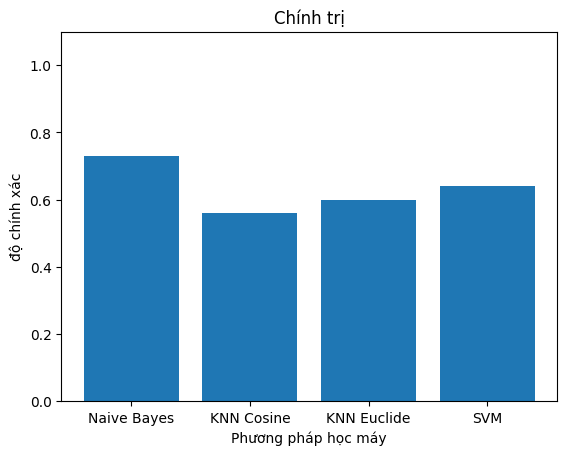

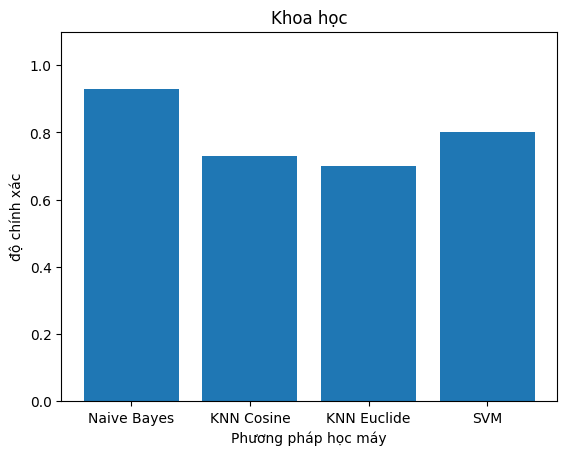

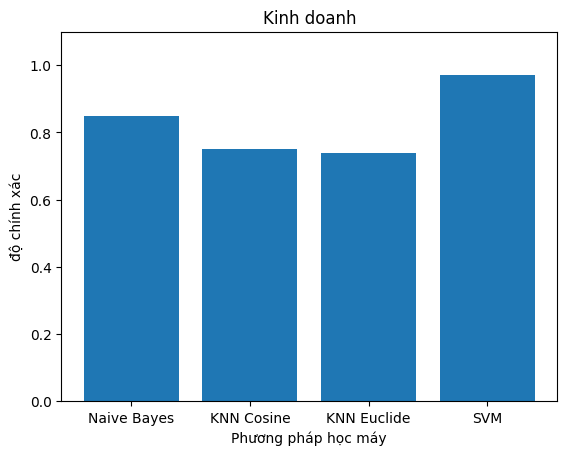

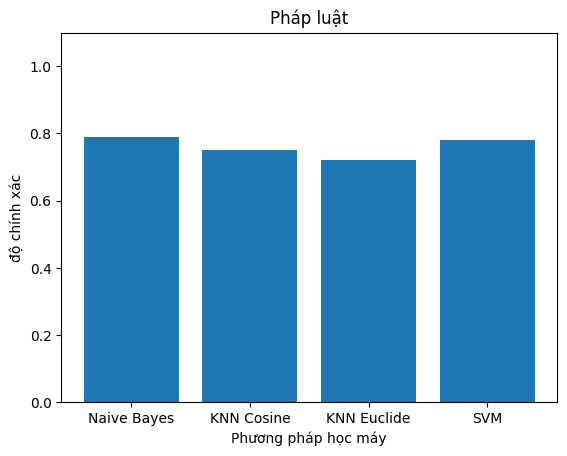

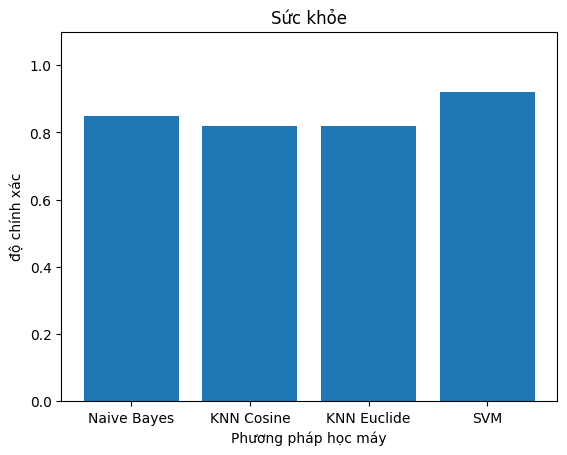

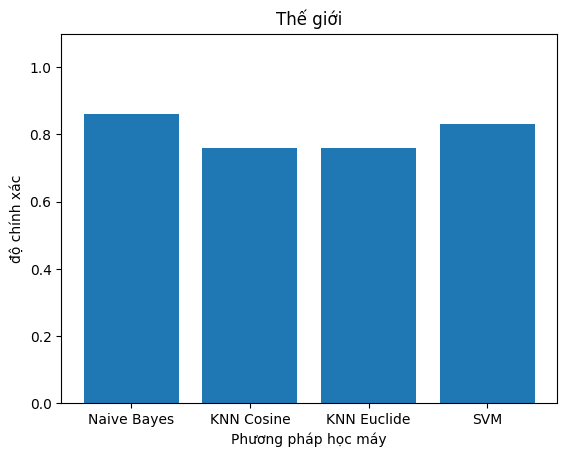

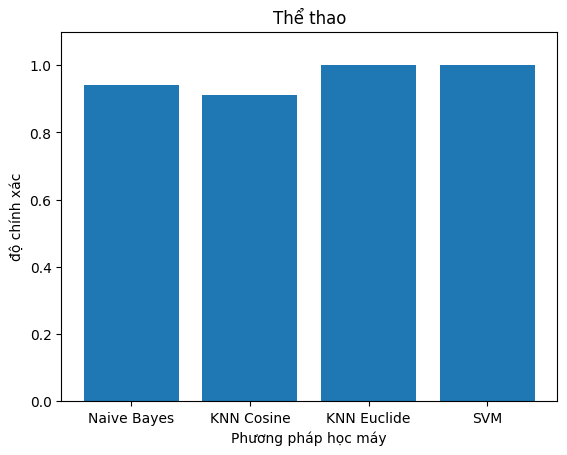

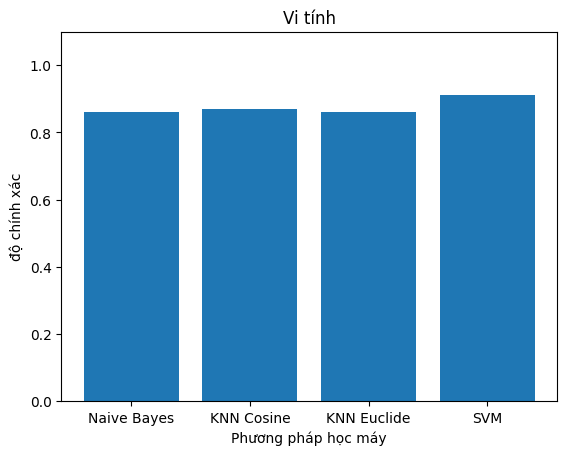

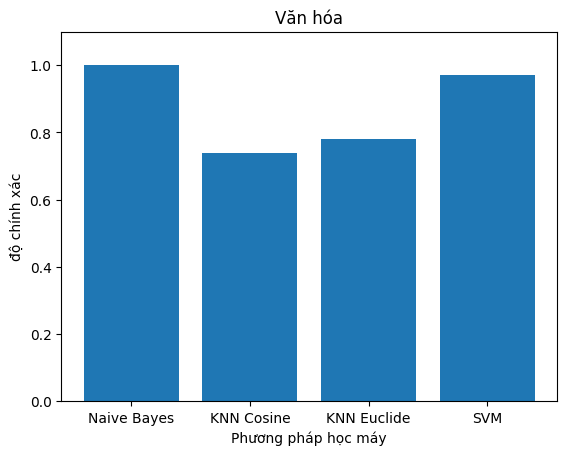

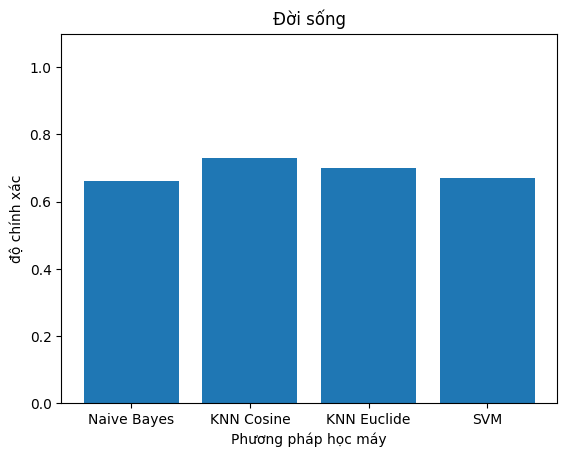

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ bảng
data = pd.DataFrame({
    "label": ["Chính trị", "Khoa học", "Kinh doanh", "Pháp luật", "Sức khỏe", "Thế giới", "Thể thao", "Vi tính", "Văn hóa", "Đời sống"],
    "Naive Bayes": [0.73, 0.93, 0.85, 0.79, 0.85, 0.86, 0.94, 0.86, 1.00, 0.66],
    "KNN Cosine": [0.56, 0.73, 0.75, 0.75, 0.82, 0.76, 0.91, 0.87, 0.74, 0.73],
    "KNN Euclide": [0.60, 0.70, 0.74, 0.72, 0.82, 0.76, 1.00, 0.86, 0.78, 0.70],
    "SVM": [0.64, 0.80, 0.97, 0.78, 0.92, 0.83, 1.00, 0.91, 0.97, 0.67]
})

# Vẽ biểu đồ cho từng label
for i in range(len(data)):
    plt.figure()
    plt.bar(["Naive Bayes", "KNN Cosine", "KNN Euclide", "SVM"], data.iloc[i, 1:5])
    plt.title(data.iloc[i, 0])
    plt.ylabel("độ chính xác")
    plt.xlabel("Phương pháp học máy")
    plt.ylim(0, 1.1)
    plt.show()

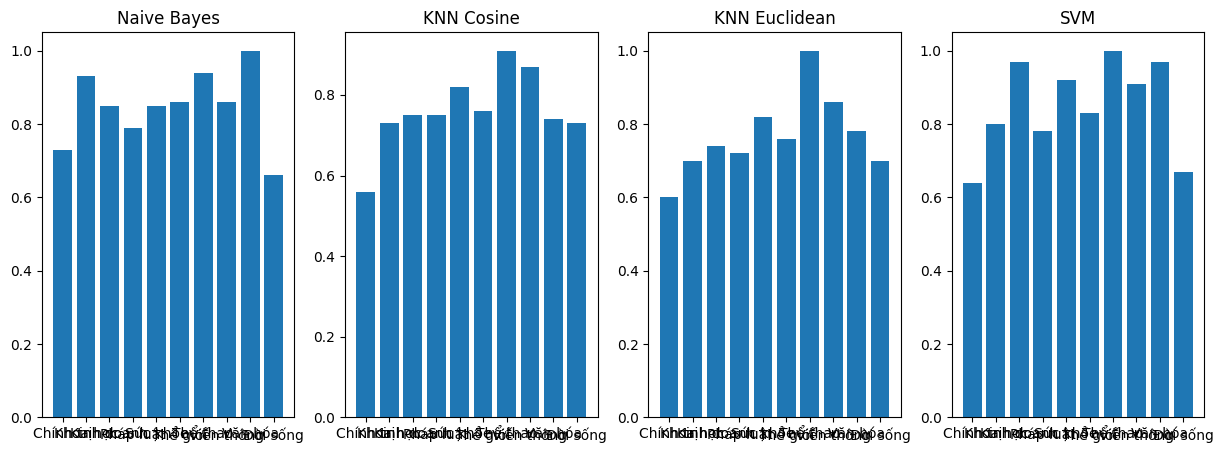

In [16]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
labels = ["Chính trị", "Khoa học", "Kinh doanh", "Pháp luật", "Sức khỏe", "Thế giới", "Thể thao", "Viễn thông", "Văn hóa", "Đời sống"]
naive_bayes_scores = [0.73, 0.93, 0.85, 0.79, 0.85, 0.86, 0.94, 0.86, 1.00, 0.66]
knn_cosine_scores = [0.56, 0.73, 0.75, 0.75, 0.82, 0.76, 0.91, 0.87, 0.74, 0.73]
knn_euclidean_scores = [0.60, 0.70, 0.74, 0.72, 0.82, 0.76, 1.00, 0.86, 0.78, 0.70]
svm_scores = [0.64, 0.80, 0.97, 0.78, 0.92, 0.83, 1.00, 0.91, 0.97, 0.67]

# Tạo biểu đồ
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Biểu đồ Naive Bayes
axs[0].bar(labels, naive_bayes_scores)
axs[0].set_title("Naive Bayes")

# Biểu đồ KNN Cosine
axs[1].bar(labels, knn_cosine_scores)
axs[1].set_title("KNN Cosine")

# Biểu đồ KNN Euclidean
axs[2].bar(labels, knn_euclidean_scores)
axs[2].set_title("KNN Euclidean")

# Biểu đồ SVM
axs[3].bar(labels, svm_scores)
axs[3].set_title("SVM")

# Hiển thị biểu đồ
plt.show()


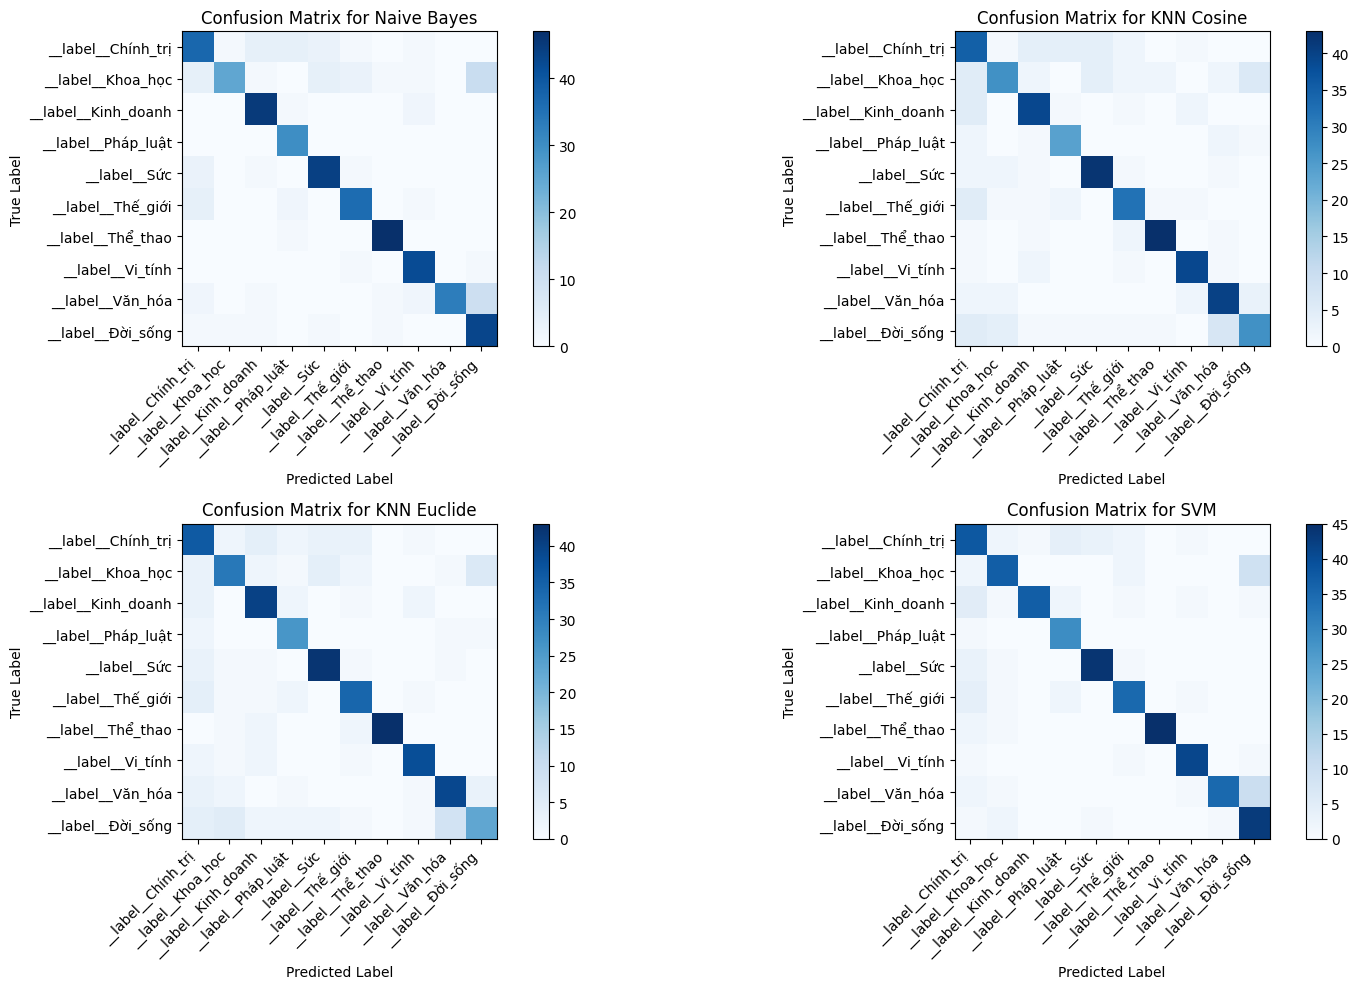

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (phần code trước đó) ...

# Tạo hình lớn để chứa các biểu đồ
plt.figure(figsize=(16, 10))

# Vẽ từng confusion matrix vào các subplot
for i, (model_name, model_path) in enumerate([
    ("Naive Bayes", "naive_bayes.pkl"),
    ("KNN Cosine", "knn_cosine.pkl"),
    ("KNN Euclide", "knn_euclide.pkl"),
    ("SVM", "svm.pkl")
]):
    model = pickle.load(open(os.path.join(MODEL_PATH, model_path), 'rb'))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 2, i + 1)  # Chia hình lớn thành 2x2 subplot
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    plt.xticks(list(range(len(label_encoder.classes_))), label_encoder.classes_, rotation=45, ha='right')
    plt.yticks(list(range(len(label_encoder.classes_))), label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các subplot
plt.show()


In [ ]:
# Thử nghiệm kết quả cho 1 văn bản model naive bayes đã load ở trên
# Một đoạn bài viết được lấy trên web có nhãn là pháp luật
document = " Tạm giam một trưởng kho tham ô 900 triệu đồng (NLĐ)- Phòng CSĐT tội phạm về trật tự quản lý kinh tế và chức vụ Công an TPHCM vừa ra quyết định khởi tố, bắt tạm giam bị can Lê Diệu (sinh 1949, ngụ quận Tân Bình-TPHCM) nguyên trưởng kho Bách hóa 1 (thuộc Công ty Bách hóa 2 - Bộ Thương Mại) về hành vi tham ô hơn 900 triệu đồng.Theo kết quả điều tra ban đầu của cơ quan công an, với chức trưởng kho, trong 2 năm 2001 đến 2002, ông Diệu đã chỉ đạo cho 2 nhân viên dưới quyền là bà Nguyễn Thị Luyến và Bùi Thị Ngọc Sương thu tiền thuê kho của khách hàng rồi gian lận chứng từ, không nộp đủ tiền về công ty để chia nhau tiêu xài. Tổng số tiền thất thoát lên hơn 900 triệu đồng. Nguyễn Thị Luyến và Bùi Thị Ngọc Sương cũng bị khởi tố về hành vi tham ô nhưng được cho tại ngoại. "
document = text_preprocess(document)
document = remove_stopwords(document)
nb_model = pickle.load(open(os.path.join(MODEL_PATH,"naive_bayes.pkl"), 'rb'))
label = nb_model.predict([document])
print('Predict label:', label_encoder.inverse_transform(label))

Predict label: ['__label__Pháp_luật']
